# Cookie Cats A/B Testing Analysis
This analysis examines the impact of moving the first gate from level 30 to level 40.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Set the style for our visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

#1. Load the dataset

In [3]:
df = pd.read_csv('cookie_cats.csv')

# 2. Exploratory Data Analysis

In [4]:
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check distribution of versions (control vs. treatment)
print("\nDistribution of versions:")
print(df['version'].value_counts())
print(df['version'].value_counts(normalize=True))

Dataset shape: (90189, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB
None

First 5 rows:
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

Summary statistics:
             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean 

# 3. Analysis of Game Rounds

<ipython-input-18-faa4254ff873>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Version')



Game rounds summary by version:
              mean  median         std  count
version                                      
gate_30  52.456264    17.0  256.716423  44700
gate_40  51.298776    16.0  103.294416  45489

T-test for game rounds (gate_30 vs gate_40):
t-statistic: 0.8854
p-value: 0.3759
Significant difference: False


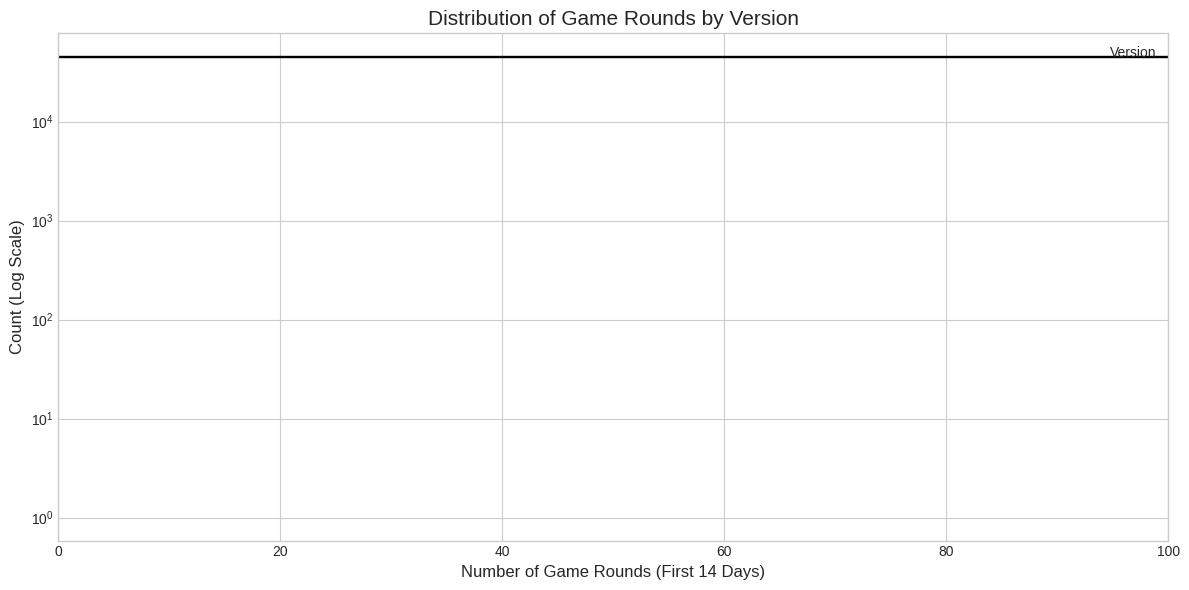

In [18]:
# Visualize the distribution of game rounds
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sum_gamerounds', hue='version', bins=30, alpha=0.6, log_scale=(False, True))
plt.title('Distribution of Game Rounds by Version', fontsize=15)
plt.xlabel('Number of Game Rounds (First 14 Days)', fontsize=12)
plt.ylabel('Count (Log Scale)', fontsize=12)
plt.xlim(0, 100)  # Focus on the majority of the data
plt.legend(title='Version')
plt.tight_layout()
# plt.savefig('game_rounds_distribution.png')
# plt.close()

# Compute summary statistics for game rounds by version
rounds_by_version = df.groupby('version')['sum_gamerounds'].agg(['mean', 'median', 'std', 'count'])
print("\nGame rounds summary by version:")
print(rounds_by_version)

# Perform t-test to compare game rounds between versions
ttest_rounds = stats.ttest_ind(
    df[df['version'] == 'gate_30']['sum_gamerounds'],
    df[df['version'] == 'gate_40']['sum_gamerounds'],
    equal_var=False  # Welch's t-test for unequal variances
)
print("\nT-test for game rounds (gate_30 vs gate_40):")
print(f"t-statistic: {ttest_rounds.statistic:.4f}")
print(f"p-value: {ttest_rounds.pvalue:.4f}")
print(f"Significant difference: {ttest_rounds.pvalue < 0.05}")

## Analysis of 1-Day Retention


1-day retention by version:
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


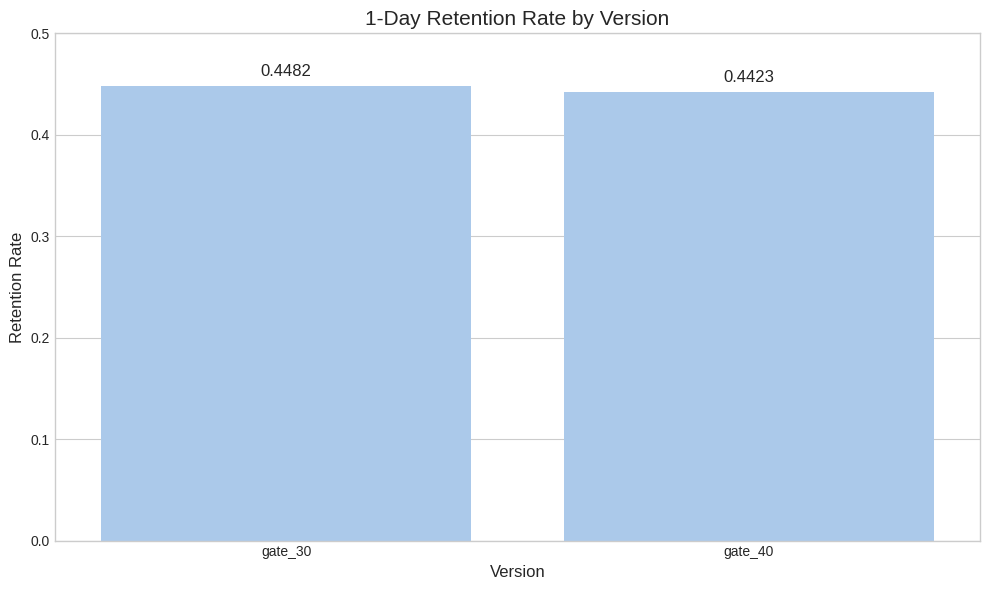

In [19]:
# Calculate retention rates
retention1_by_version = df.groupby('version')['retention_1'].mean()
print("\n1-day retention by version:")
print(retention1_by_version)

# Create a bar chart for 1-day retention
plt.figure(figsize=(10, 6))
sns.barplot(x=retention1_by_version.index, y=retention1_by_version.values)
plt.title('1-Day Retention Rate by Version', fontsize=15)
plt.xlabel('Version', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)
plt.ylim(0, 0.5)  # Set a reasonable y-axis range
for i, v in enumerate(retention1_by_version.values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.tight_layout()
# plt.savefig('1day_retention.png')
# plt.close()

In [7]:
# Perform z-test for proportions on 1-day retention
count_success_1day = df.groupby('version')['retention_1'].sum()
count_total = df.groupby('version').size()

ztest_1day = proportions_ztest(
    count=count_success_1day,
    nobs=count_total
)
print("\nZ-test for 1-day retention (gate_30 vs gate_40):")
print(f"z-statistic: {ztest_1day[0]:.4f}")
print(f"p-value: {ztest_1day[1]:.4f}")
print(f"Significant difference: {ztest_1day[1] < 0.05}")


Z-test for 1-day retention (gate_30 vs gate_40):
z-statistic: 1.7841
p-value: 0.0744
Significant difference: False


### Analysis of 7-Day Retention


7-day retention by version:
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Z-test for 7-day retention (gate_30 vs gate_40):
z-statistic: 3.1644
p-value: 0.0016
Significant difference: True


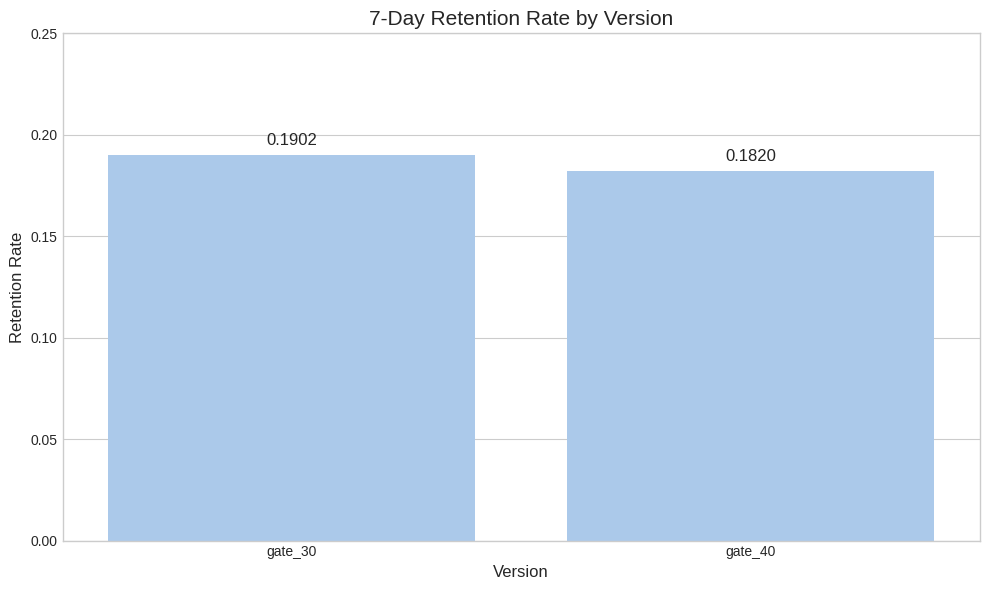

In [20]:
# Calculate retention rates
retention7_by_version = df.groupby('version')['retention_7'].mean()
print("\n7-day retention by version:")
print(retention7_by_version)

# Create a bar chart for 7-day retention
plt.figure(figsize=(10, 6))
sns.barplot(x=retention7_by_version.index, y=retention7_by_version.values)
plt.title('7-Day Retention Rate by Version', fontsize=15)
plt.xlabel('Version', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)
plt.ylim(0, 0.25)  # Set a reasonable y-axis range
for i, v in enumerate(retention7_by_version.values):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=12)
plt.tight_layout()
# plt.savefig('7day_retention.png')
# plt.close()

# Perform z-test for proportions on 7-day retention
count_success_7day = df.groupby('version')['retention_7'].sum()

ztest_7day = proportions_ztest(
    count=count_success_7day,
    nobs=count_total
)
print("\nZ-test for 7-day retention (gate_30 vs gate_40):")
print(f"z-statistic: {ztest_7day[0]:.4f}")
print(f"p-value: {ztest_7day[1]:.4f}")
print(f"Significant difference: {ztest_7day[1] < 0.05}")

### Visualize Both Retention Metrics Together

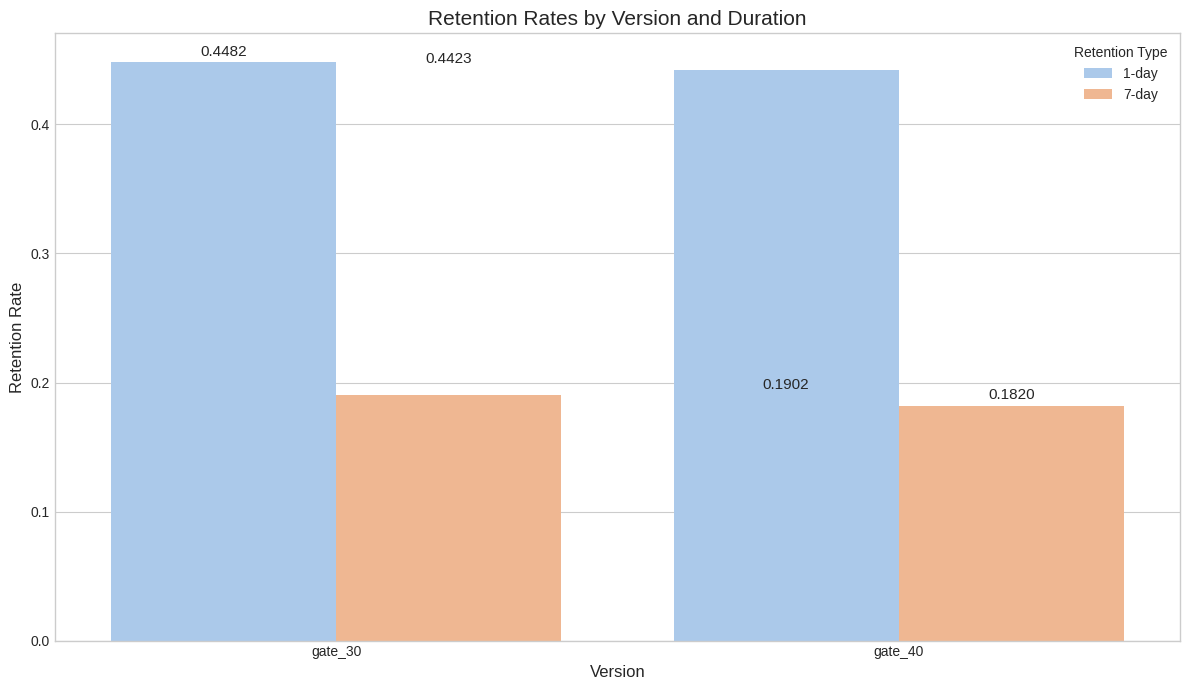

In [21]:
retention_data = pd.DataFrame({
    'Version': ['gate_30', 'gate_30', 'gate_40', 'gate_40'],
    'Retention Type': ['1-day', '7-day', '1-day', '7-day'],
    'Retention Rate': [
        retention1_by_version['gate_30'],
        retention7_by_version['gate_30'],
        retention1_by_version['gate_40'],
        retention7_by_version['gate_40']
    ]
})

plt.figure(figsize=(12, 7))
sns.barplot(x='Version', y='Retention Rate', hue='Retention Type', data=retention_data)
plt.title('Retention Rates by Version and Duration', fontsize=15)
plt.xlabel('Version', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)
plt.legend(title='Retention Type')

#  Add the values on top of the bars
for i, row in enumerate(retention_data.itertuples()):
    plt.text(i % 2 - 0.2 if i < 2 else i % 2 + 0.2,
             row[3] + 0.005,
             f"{row[3]:.4f}",
             ha='center', fontsize=11)

plt.tight_layout()
# plt.savefig('both_retention_rates.png')
# plt.close()

### Bootstrap Analysis for Confidence Intervals

In [11]:
np.random.seed(42)  # For reproducibility
n_bootstraps = 10000
boot_1day_diff = []
boot_7day_diff = []

for _ in range(n_bootstraps):
    # Sample with replacement from each group
    boot_gate30 = df[df['version'] == 'gate_30'].sample(frac=1, replace=True)
    boot_gate40 = df[df['version'] == 'gate_40'].sample(frac=1, replace=True)

    # Calculate the differences in retention rates
    diff_1day = boot_gate30['retention_1'].mean() - boot_gate40['retention_1'].mean()
    diff_7day = boot_gate30['retention_7'].mean() - boot_gate40['retention_7'].mean()

    boot_1day_diff.append(diff_1day)
    boot_7day_diff.append(diff_7day)

# Confidence intervals for the differences
ci_1day = np.percentile(boot_1day_diff, [2.5, 97.5])
ci_7day = np.percentile(boot_7day_diff, [2.5, 97.5])

print("\nBootstrap 95% Confidence Intervals:")
print(f"1-day retention difference (gate_30 - gate_40): {np.mean(boot_1day_diff):.6f} [{ci_1day[0]:.6f}, {ci_1day[1]:.6f}]")
print(f"7-day retention difference (gate_30 - gate_40): {np.mean(boot_7day_diff):.6f} [{ci_7day[0]:.6f}, {ci_7day[1]:.6f}]")


Bootstrap 95% Confidence Intervals:
1-day retention difference (gate_30 - gate_40): 0.005903 [-0.000586, 0.012366]
7-day retention difference (gate_30 - gate_40): 0.008211 [0.003155, 0.013169]


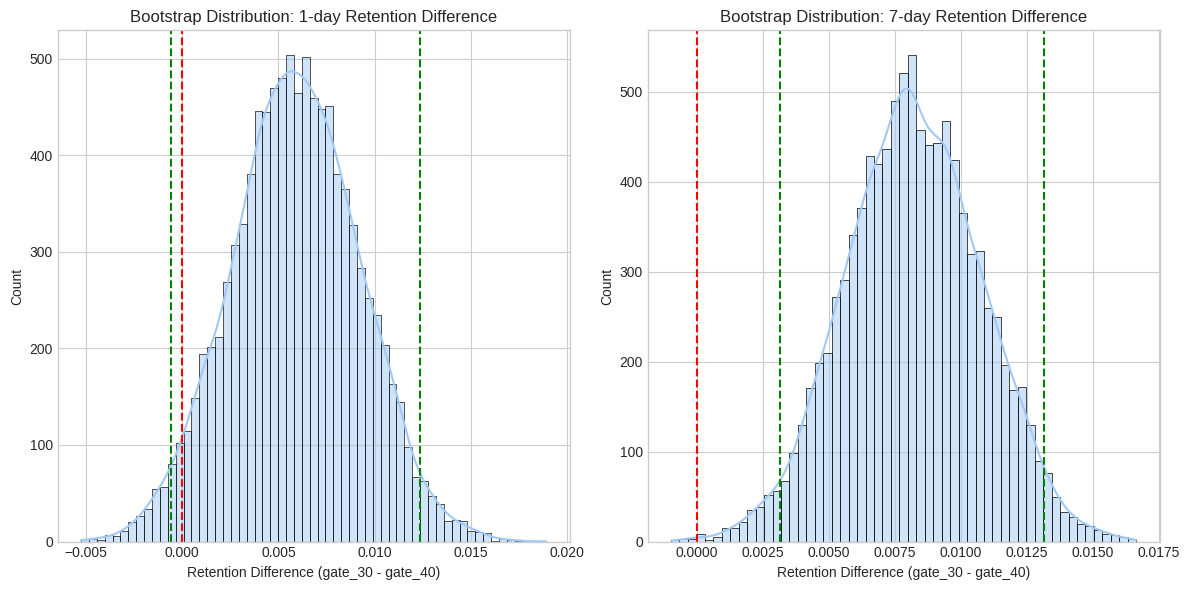

In [22]:
# Visualize bootstrap distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(boot_1day_diff, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=ci_1day[0], color='green', linestyle='--')
plt.axvline(x=ci_1day[1], color='green', linestyle='--')
plt.title('Bootstrap Distribution: 1-day Retention Difference', fontsize=12)
plt.xlabel('Retention Difference (gate_30 - gate_40)', fontsize=10)

plt.subplot(1, 2, 2)
sns.histplot(boot_7day_diff, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=ci_7day[0], color='green', linestyle='--')
plt.axvline(x=ci_7day[1], color='green', linestyle='--')
plt.title('Bootstrap Distribution: 7-day Retention Difference', fontsize=12)
plt.xlabel('Retention Difference (gate_30 - gate_40)', fontsize=10)

plt.tight_layout()
# plt.savefig('bootstrap_distributions.png')
# plt.close()

### Effect of Game Rounds on Retention

<ipython-input-23-5edce1d706f9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_rounds = df.groupby(['version', 'rounds_bin'])[['retention_1', 'retention_7']].mean().reset_index()


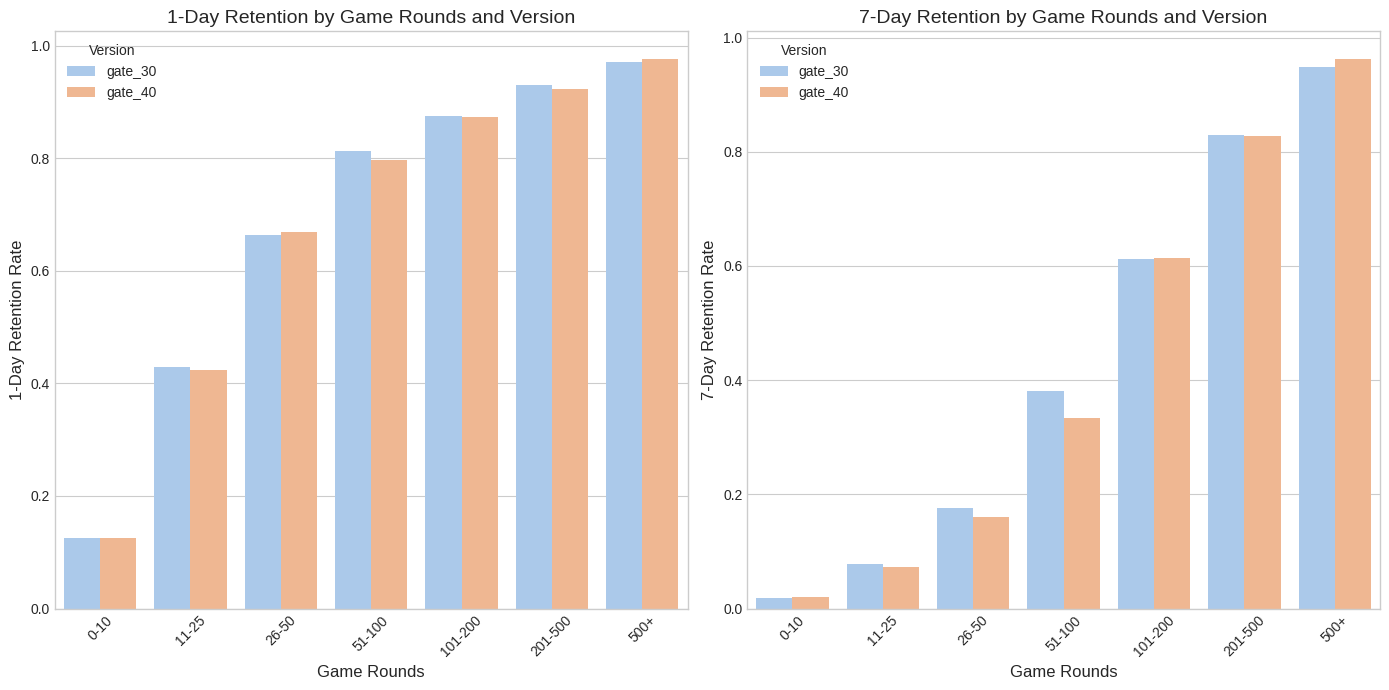

In [23]:
# Create bins for game rounds
df['rounds_bin'] = pd.cut(df['sum_gamerounds'],
                         bins=[0, 10, 25, 50, 100, 200, 500, np.inf],
                         labels=['0-10', '11-25', '26-50', '51-100', '101-200', '201-500', '500+'])

# Calculate retention rates by game rounds bins and version
retention_by_rounds = df.groupby(['version', 'rounds_bin'])[['retention_1', 'retention_7']].mean().reset_index()

# Plot 1-day retention by rounds and version
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='rounds_bin', y='retention_1', hue='version', data=retention_by_rounds)
plt.title('1-Day Retention by Game Rounds and Version', fontsize=14)
plt.xlabel('Game Rounds', fontsize=12)
plt.ylabel('1-Day Retention Rate', fontsize=12)
plt.legend(title='Version')
plt.xticks(rotation=45)

# Plot 7-day retention by rounds and version
plt.subplot(1, 2, 2)
sns.barplot(x='rounds_bin', y='retention_7', hue='version', data=retention_by_rounds)
plt.title('7-Day Retention by Game Rounds and Version', fontsize=14)
plt.xlabel('Game Rounds', fontsize=12)
plt.ylabel('7-Day Retention Rate', fontsize=12)
plt.legend(title='Version')
plt.xticks(rotation=45)

plt.tight_layout()
# plt.savefig('retention_by_rounds.png')
# plt.close()

### Conclusion and Recommendations

In [14]:
print("\n===== A/B Test Conclusions =====")
print(f"Number of players in gate_30 (control): {count_total['gate_30']}")
print(f"Number of players in gate_40 (treatment): {count_total['gate_40']}")

print("\nAnalysis of Game Rounds:")
print(f"Average game rounds in gate_30: {rounds_by_version.loc['gate_30', 'mean']:.2f}")
print(f"Average game rounds in gate_40: {rounds_by_version.loc['gate_40', 'mean']:.2f}")
if ttest_rounds.pvalue < 0.05:
    print("There is a statistically significant difference in the number of game rounds.")
else:
    print("There is NO statistically significant difference in the number of game rounds.")


===== A/B Test Conclusions =====
Number of players in gate_30 (control): 44700
Number of players in gate_40 (treatment): 45489

Analysis of Game Rounds:
Average game rounds in gate_30: 52.46
Average game rounds in gate_40: 51.30
There is NO statistically significant difference in the number of game rounds.


In [15]:
print("\nAnalysis of 1-Day Retention:")
print(f"1-day retention in gate_30: {retention1_by_version['gate_30']:.4f}")
print(f"1-day retention in gate_40: {retention1_by_version['gate_40']:.4f}")
print(f"Absolute difference: {retention1_by_version['gate_30'] - retention1_by_version['gate_40']:.4f}")
print(f"Relative difference: {(retention1_by_version['gate_30'] / retention1_by_version['gate_40'] - 1) * 100:.2f}%")
if ztest_1day[1] < 0.05:
    print("The difference in 1-day retention is statistically significant.")
else:
    print("The difference in 1-day retention is NOT statistically significant.")


Analysis of 1-Day Retention:
1-day retention in gate_30: 0.4482
1-day retention in gate_40: 0.4423
Absolute difference: 0.0059
Relative difference: 1.34%
The difference in 1-day retention is NOT statistically significant.


In [16]:
print("\nAnalysis of 7-Day Retention:")
print(f"7-day retention in gate_30: {retention7_by_version['gate_30']:.4f}")
print(f"7-day retention in gate_40: {retention7_by_version['gate_40']:.4f}")
print(f"Absolute difference: {retention7_by_version['gate_30'] - retention7_by_version['gate_40']:.4f}")
print(f"Relative difference: {(retention7_by_version['gate_30'] / retention7_by_version['gate_40'] - 1) * 100:.2f}%")
if ztest_7day[1] < 0.05:
    print("The difference in 7-day retention is statistically significant.")
else:
    print("The difference in 7-day retention is NOT statistically significant.")


Analysis of 7-Day Retention:
7-day retention in gate_30: 0.1902
7-day retention in gate_40: 0.1820
Absolute difference: 0.0082
Relative difference: 4.51%
The difference in 7-day retention is statistically significant.


In [17]:
print("\nFinal Recommendation:")
if retention1_by_version['gate_30'] > retention1_by_version['gate_40'] and retention7_by_version['gate_30'] > retention7_by_version['gate_40']:
    if ztest_1day[1] < 0.05 or ztest_7day[1] < 0.05:
        print("Based on the analysis, the gate at level 30 (control) performs better than the gate at level 40 (treatment).")
        print("Recommendation: Keep the first gate at level 30.")
    else:
        print("Although gate_30 shows higher retention, the differences are not statistically significant.")
        print("Recommendation: Additional testing with a larger sample size may be needed.")
elif retention1_by_version['gate_40'] > retention1_by_version['gate_30'] and retention7_by_version['gate_40'] > retention7_by_version['gate_30']:
    if ztest_1day[1] < 0.05 or ztest_7day[1] < 0.05:
        print("Based on the analysis, the gate at level 40 (treatment) performs better than the gate at level 30 (control).")
        print("Recommendation: Move the first gate to level 40.")
    else:
        print("Although gate_40 shows higher retention, the differences are not statistically significant.")
        print("Recommendation: Additional testing with a larger sample size may be needed.")
else:
    print("Results are mixed between 1-day and 7-day retention.")
    print("Recommendation: Consider which metric is more important for the business and potentially conduct further testing.")


Final Recommendation:
Based on the analysis, the gate at level 30 (control) performs better than the gate at level 40 (treatment).
Recommendation: Keep the first gate at level 30.
